In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(cowplot)
    library(broom)
    library(dbscan)
    theme_set(theme_cowplot())
})
options(repr.plot.width=15,repr.plot.height=9)

# Clustering

# k-means clustering

In [2]:
data("penguins", package = "modeldata")
head(penguins,3)

data <- na.omit(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Torgersen,39.1,18.7,181,3750,male
Adelie,Torgersen,39.5,17.4,186,3800,female
Adelie,Torgersen,40.3,18.0,195,3250,female


In [3]:
kmeans.obj <- 
    select(data, bill_length_mm, bill_depth_mm) |>
    kmeans(centers=3)

In [4]:
glance(kmeans.obj)
tidy(kmeans.obj)

totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<int>
11216.3616216216,2265.06659663866,8951.29502498297,3


bill_length_mm,bill_depth_mm,size,withinss,cluster
<dbl>,<dbl>,<int>,<dbl>,<fct>
38.4242647058823,18.2779411764706,136,904.983750000000,1
45.5098214285714,15.6830357142857,112,742.096964285715,2
50.9035294117647,17.3364705882353,85,617.985882352941,3


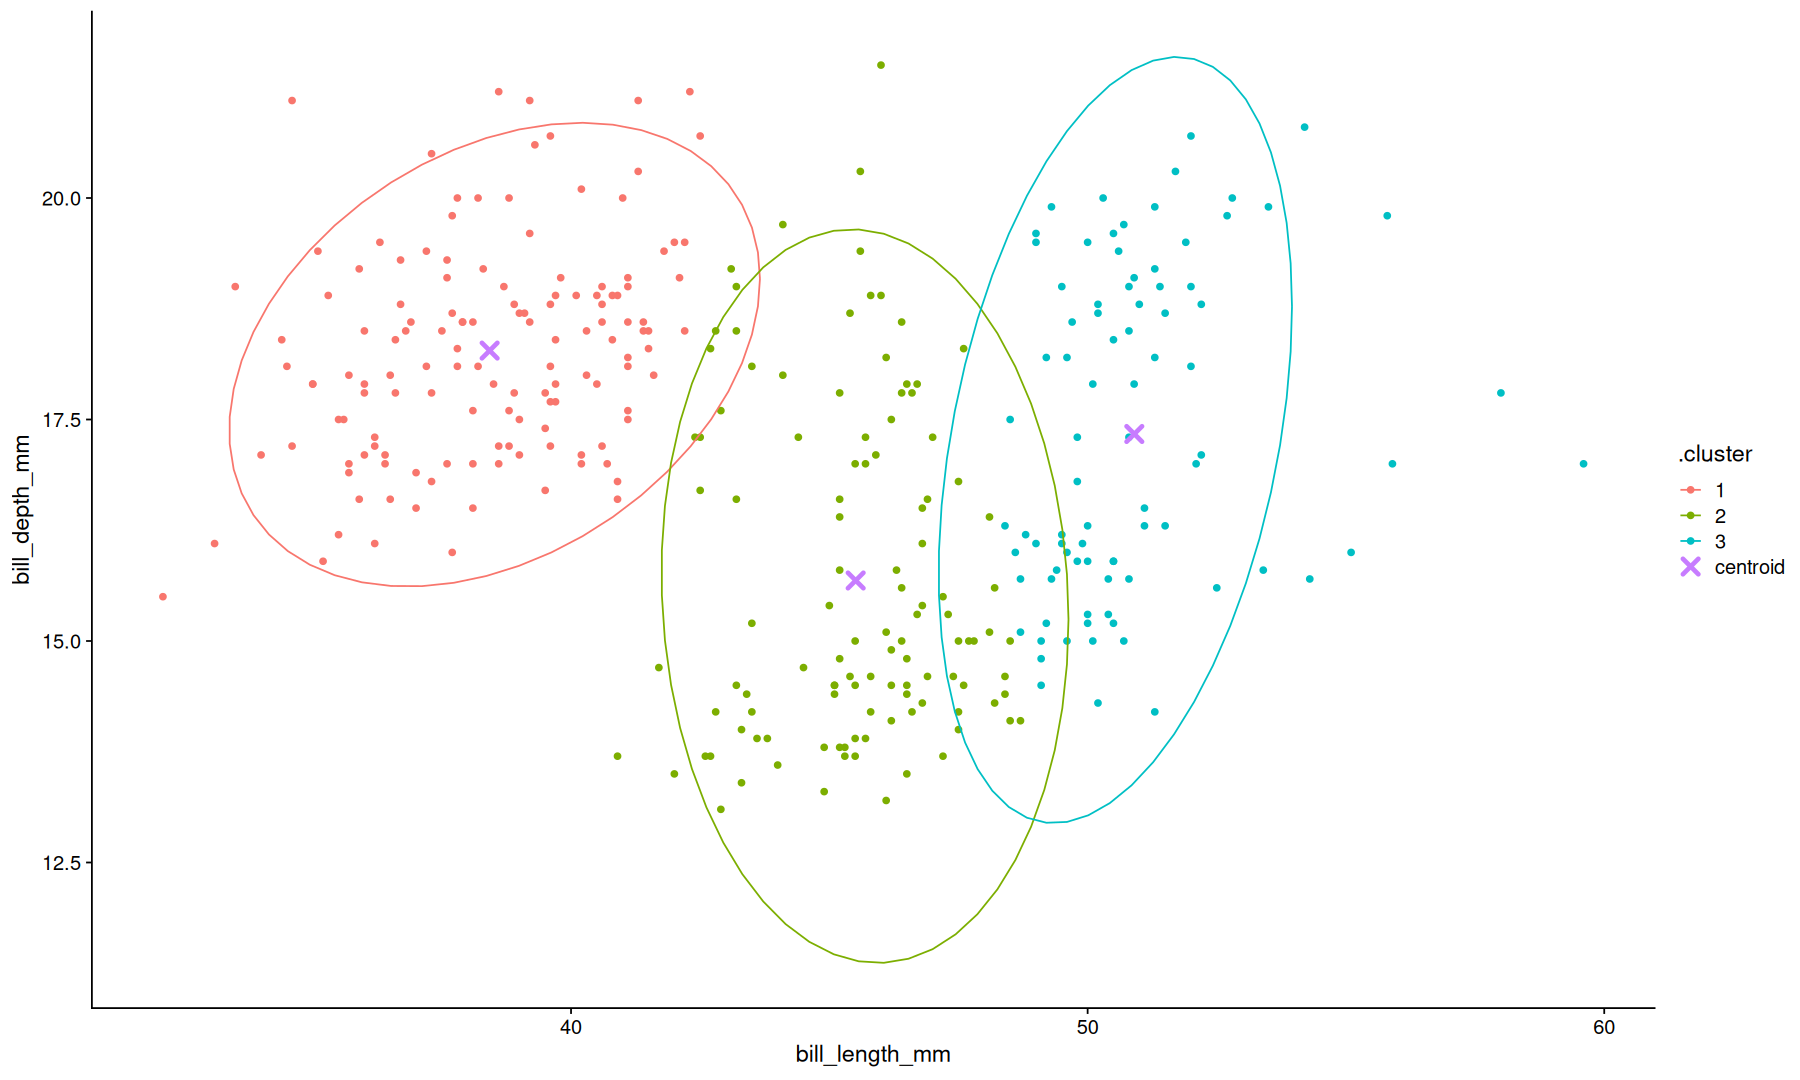

In [5]:
augment(kmeans.obj, data) |>
ggplot(aes(x=bill_length_mm, y=bill_depth_mm, color=.cluster)) +
geom_point() +
geom_point(data=tidy(kmeans.obj), shape=4, size=3, stroke=2, aes(color='centroid'))  +
stat_ellipse()

# hierarchical clustering

In [6]:
select(data, bill_length_mm, bill_depth_mm) |>
as.matrix() |>
dist(method = 'canberra') |>
hclust(method='ward.D2') -> hc

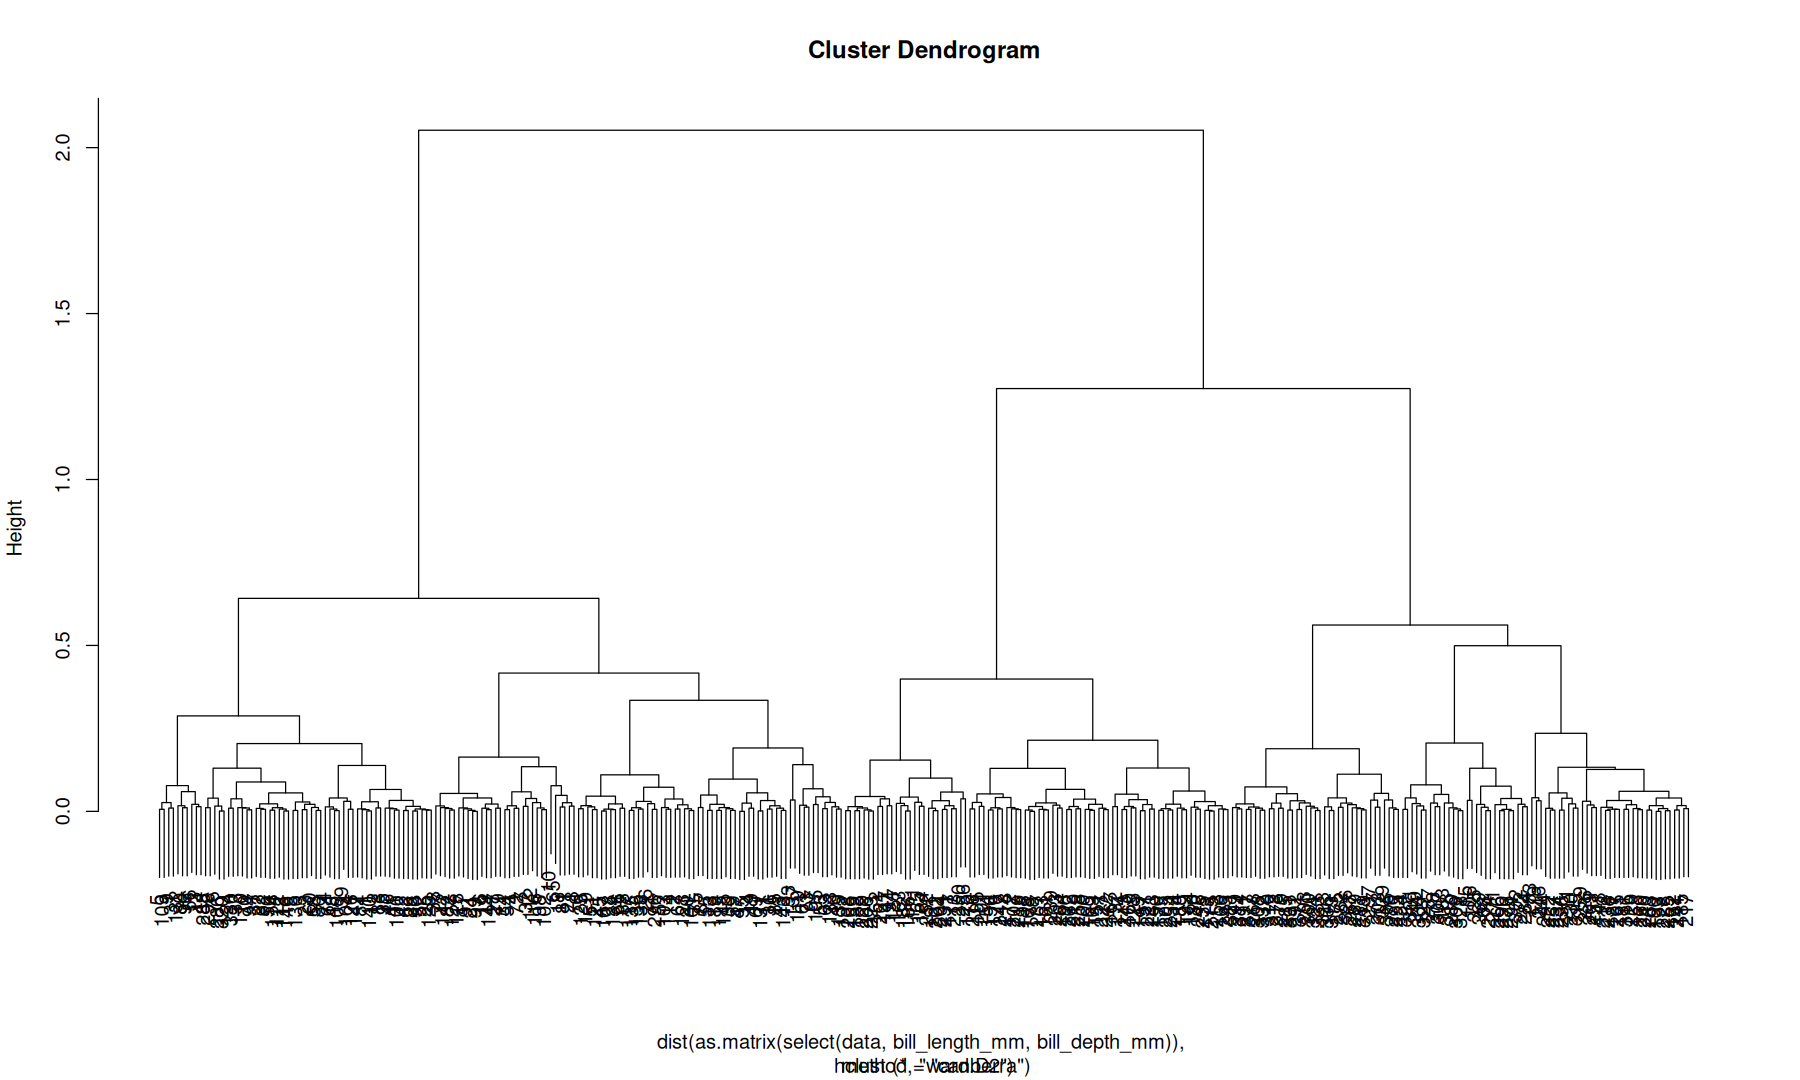

In [7]:
plot(hc)

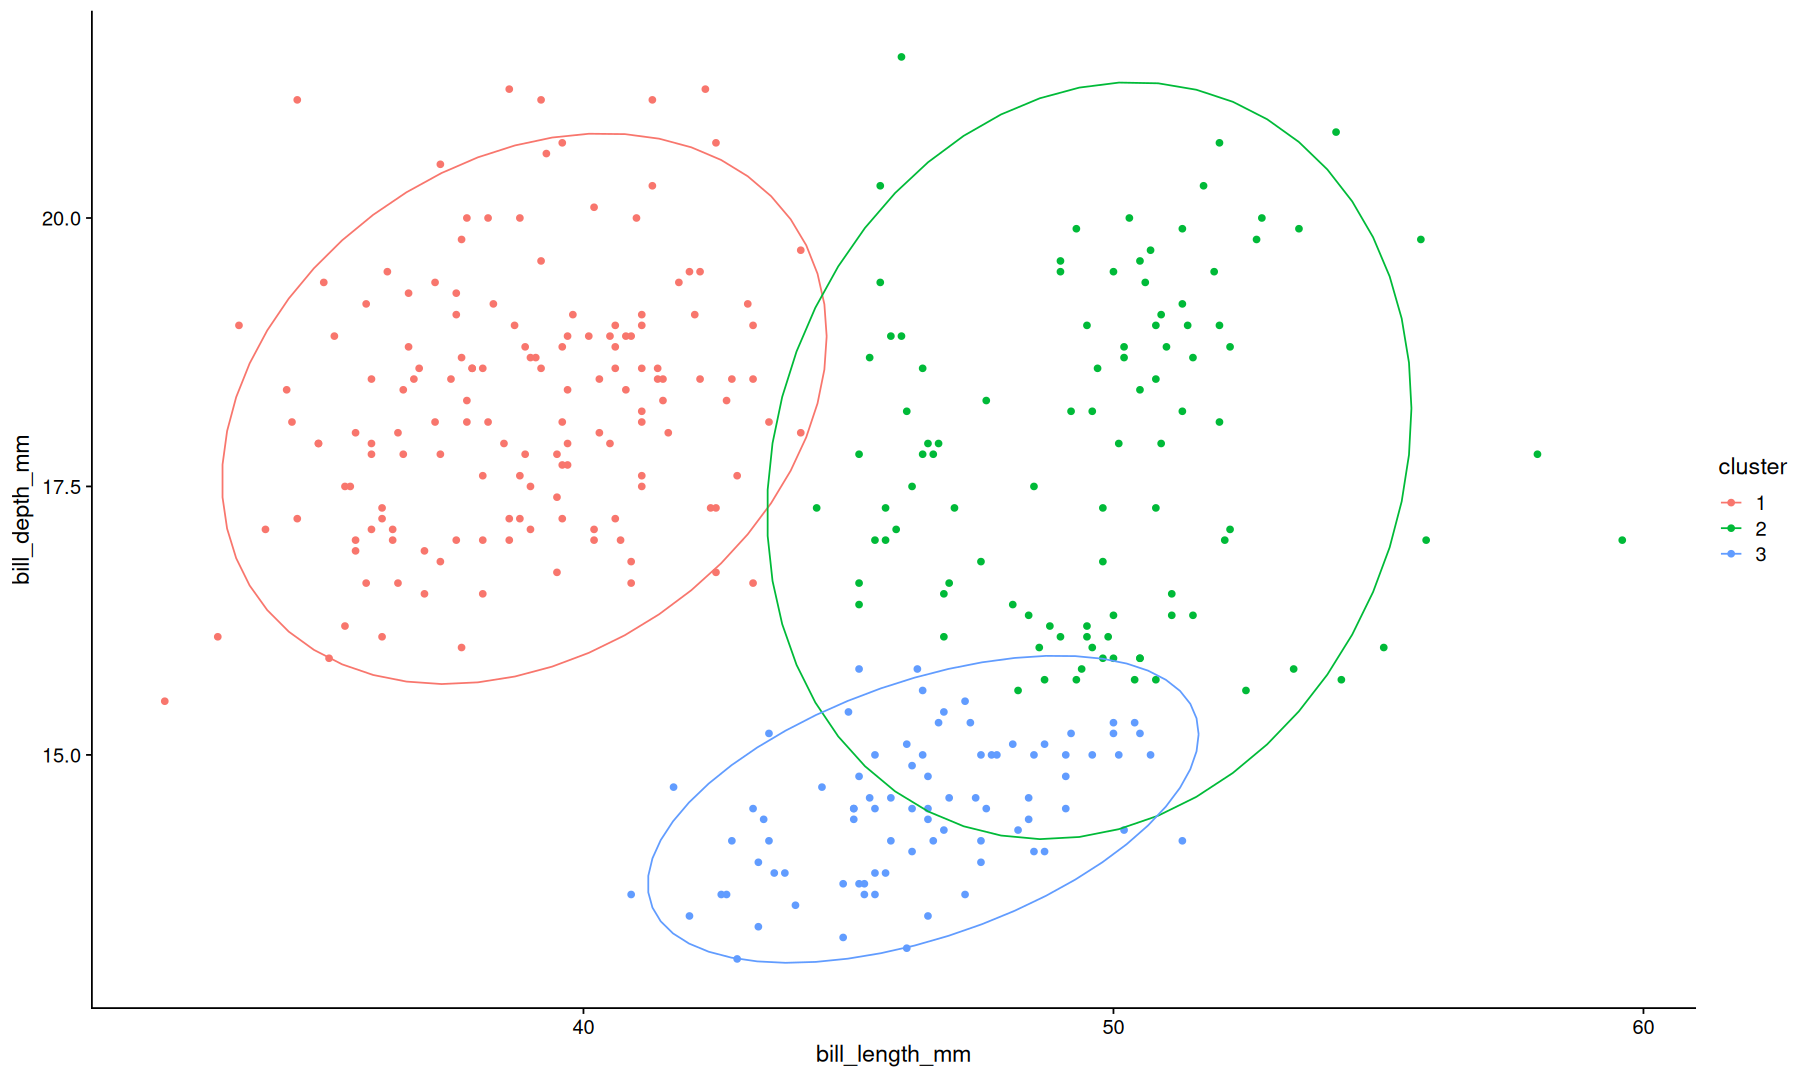

In [8]:
mutate(data, cluster=factor(cutree(hc, k=3))) |>
ggplot(aes(x=bill_length_mm, y=bill_depth_mm, color=cluster, group=cluster)) +
geom_point() +
stat_ellipse()

# density clustering

In [9]:
data(DS3, package='dbscan')

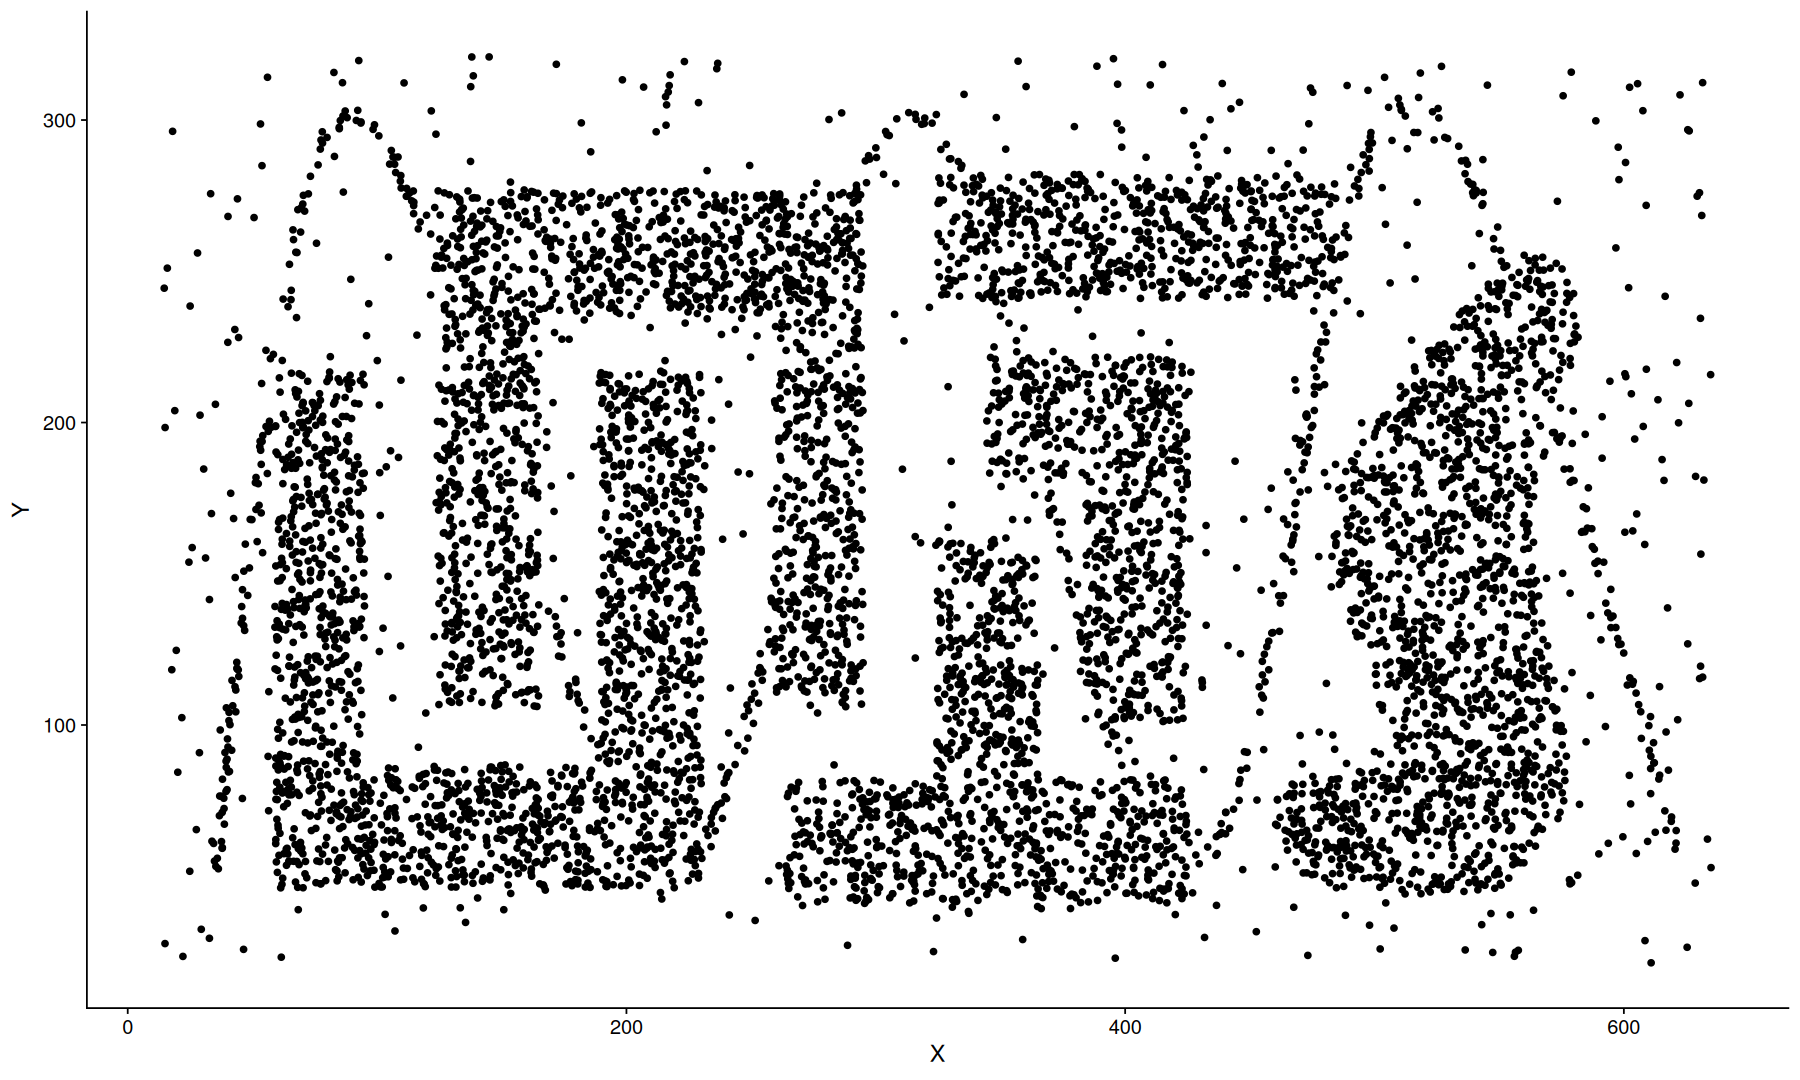

In [10]:
ggplot(DS3, aes(x=X, y=Y)) + 
geom_point()

In [11]:
dbscan.obj <- hdbscan(DS3, minPts = 25)

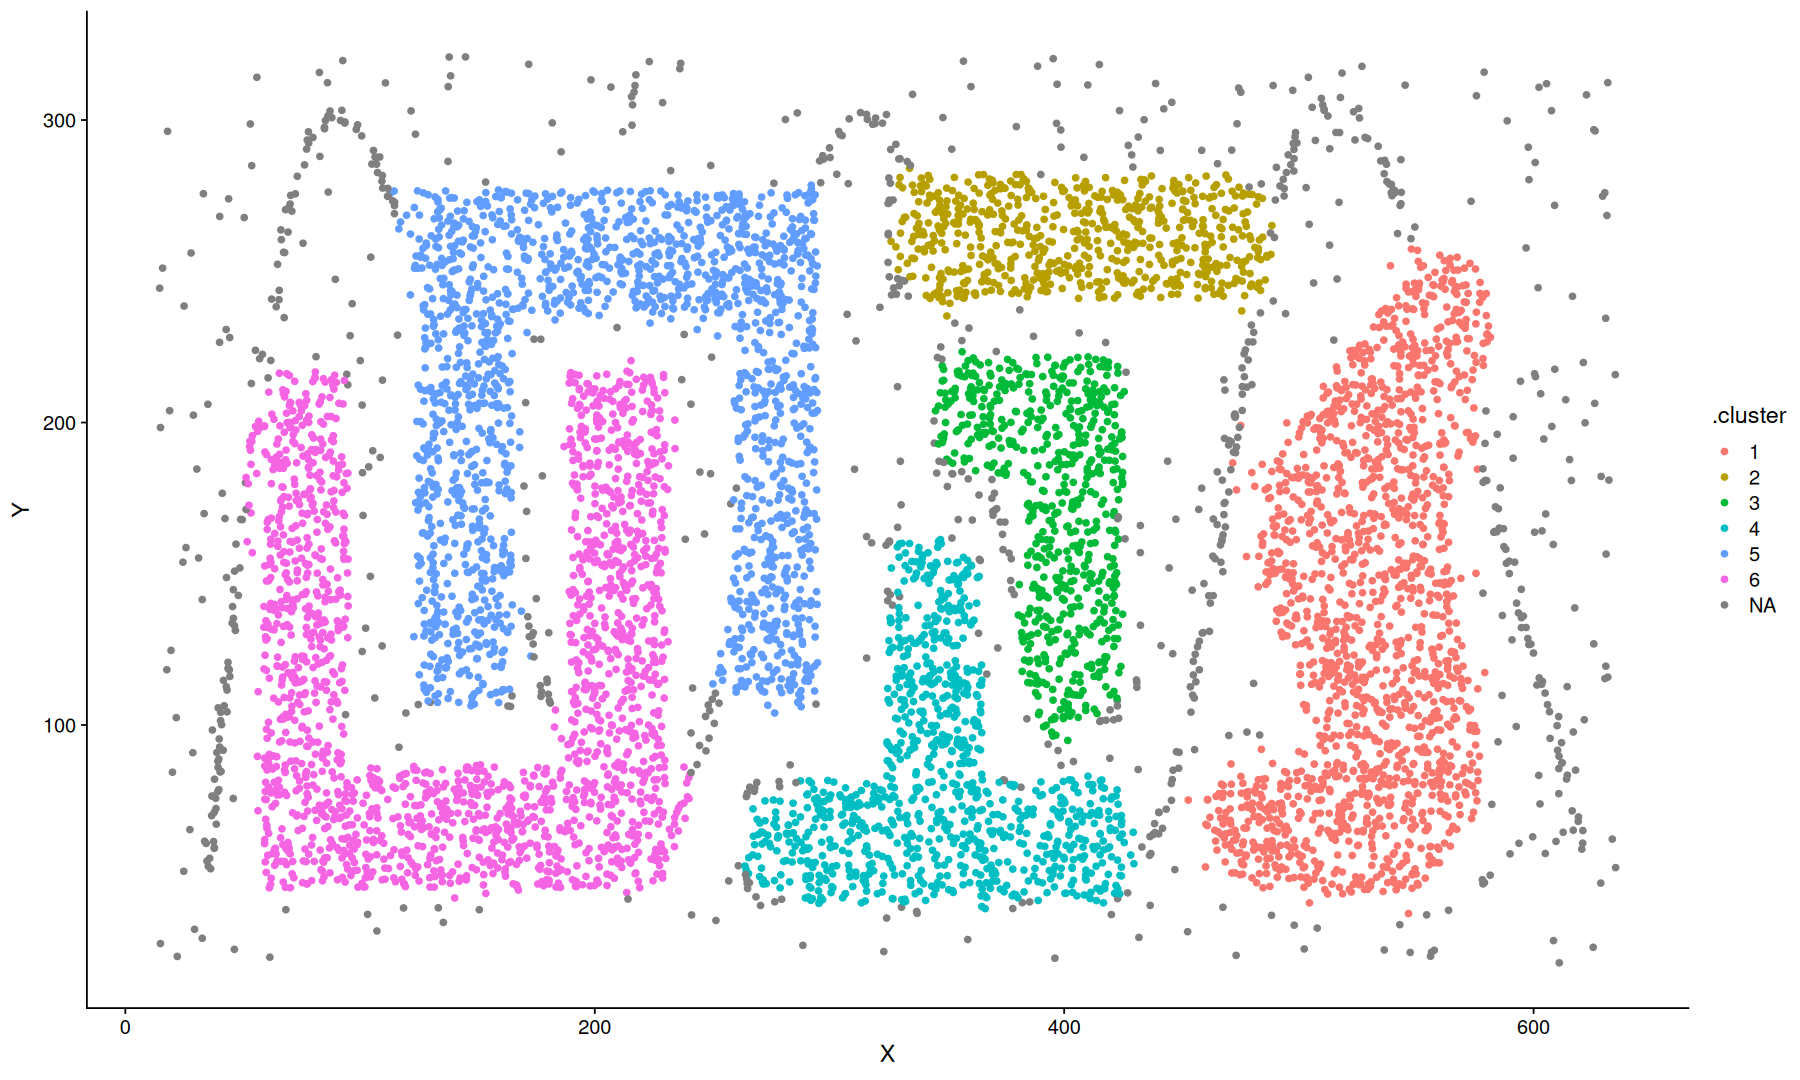

In [12]:
augment(dbscan.obj, DS3) |>
# cluster 0 is noise
mutate(.cluster=if_else(.cluster==0, NA, .cluster)) |>
ggplot(aes(x=X, y=Y, color=.cluster)) +
geom_point()